<a href="https://colab.research.google.com/github/r-autowired/AIMLWorks/blob/main/Notes/Py_Fond/Pi1_FoodHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 18.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
langchain 0.3.19 requires n

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/AIML_UT/Colab_Files/Pi1_Project/Pi1_foodhub_order.csv')

In [6]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
df.shape

(1898, 9)

#### Observations:
* There are a total of 1898 row and 9 columns in the data file (FoodHub_Order)
* There are various fields in the data file - order_id, customer_id, restaurant_name and etc...
* From the data i get to know that its a Food Ordering App with Customer order details for various restaurants and their cuisine types and its cost. Also it infers about the food preparation time and delivery time of the food to the customer and at what day it was delivered to the customer (weekday or weekend)
* Finally a rating is also given for the delivery service of the app

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* Datatypes of 9 columns : dtypes: float64(1), int64(4), object(4)
 - **int** --> 4
 - **object** --> 4
 - **float** -->1

* From the above i could see that all columns has 1898 rows that proves no column is with null or empty values

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* From the above i could see that all columns has 1898 rows that proves NO column has missing values

In [10]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
* Also from the above execution of isNull.sum() check proves that there are no null values in the given data set

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* From the statistical summary of the data for **food_preparation_time**
  - minimum time taken --> 20 mins
  - average time taken --> 27.37197 mins
  - maximum time taken --> 35 mins

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
df['rating'].value_counts()


,count
rating,
Not given,736
5,588
4,386
3,188


In [13]:
df['rating'].value_counts(normalize=True)

,proportion
rating,
Not given,0.387777
5,0.309800
4,0.203372
3,0.099052


In [14]:
not_given_cnt = df['rating'].value_counts()['Not given']
print(f"Number of orders not rated : {not_given_cnt}")

Number of orders not rated : 736


#### Observations:
* From the above data it is clearly visible that 736 ratings are not rated
* It was a total of 38.77 % ratings are not rated and that the max proportion and we might need to correct this data in case of any questions related with Ratings.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

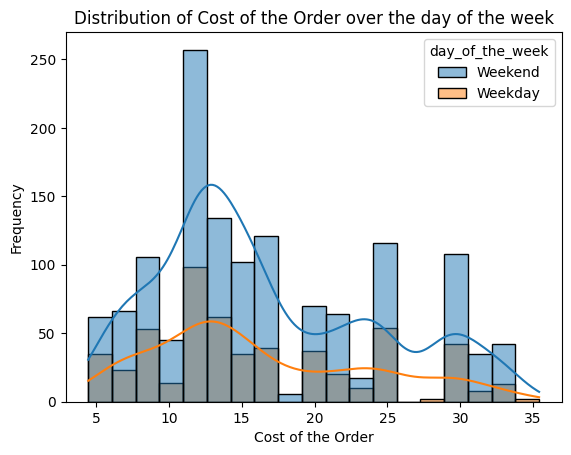

In [15]:
#Univariate:1
sns.histplot(data=df, x='cost_of_the_order' , kde=True, hue='day_of_the_week')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.title('Distribution of Cost of the Order over the day of the week')
plt.show()

####Observation
* The above plot is right skewed (left has more entries or weightage)
* And it is infered that weekend orders is much higher compared to weekday orders

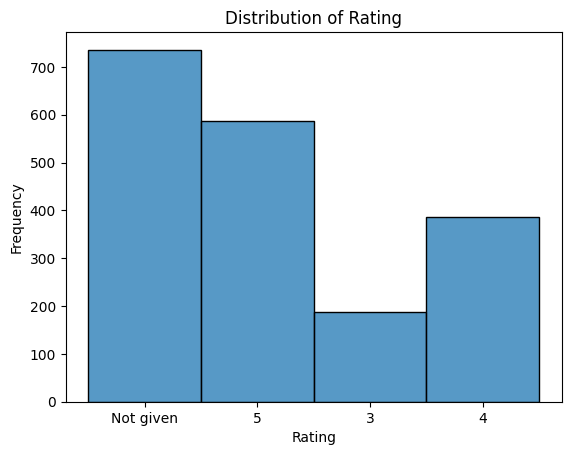

In [16]:
#Univariate:2
sns.histplot(data=df, x='rating' )
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('Distribution of Rating')
plt.show()

####Observation
- This plot gives the count of each ratings
- **Not given** rating is the highest

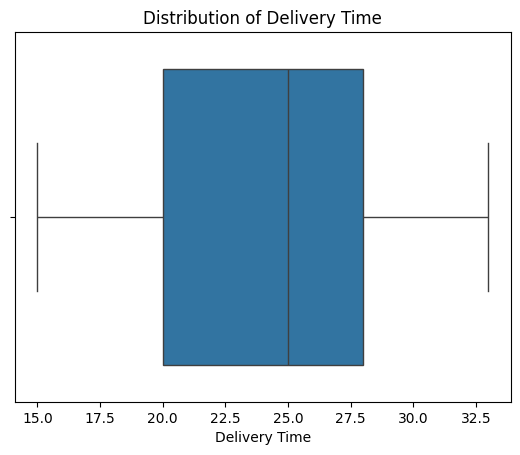

In [17]:
#Univariate:3
sns.boxplot(data=df, x='delivery_time');
plt.xlabel('Delivery Time')
plt.title('Distribution of Delivery Time')
plt.show()

####Observation
* The average time taken for delivery is 25 mins

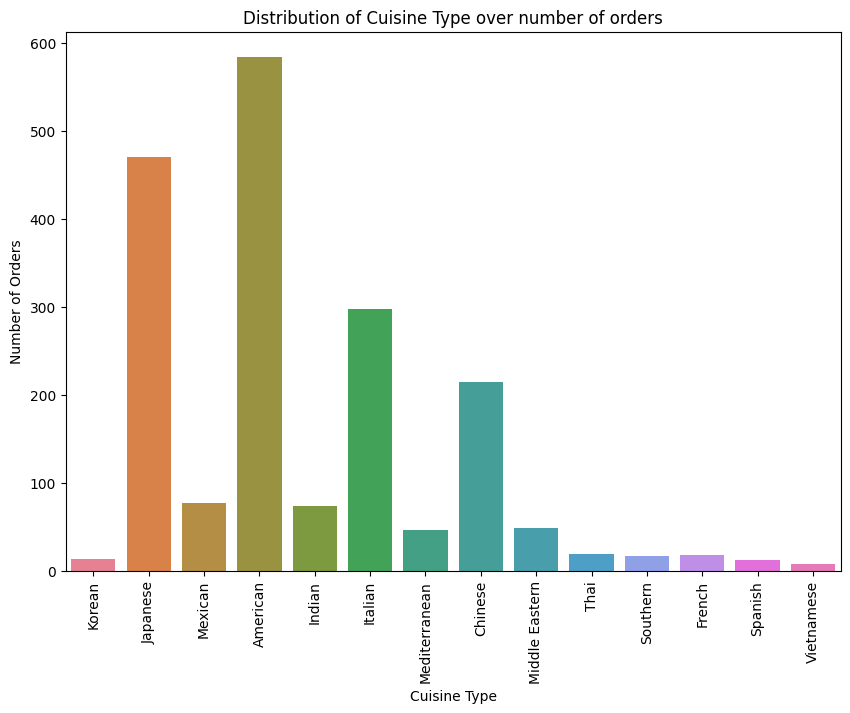

In [18]:
#Univariate:4
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='cuisine_type', hue='cuisine_type');
plt.ylabel('Number of Orders')
plt.xticks(rotation=90);
plt.xlabel('Cuisine Type')
plt.title('Distribution of Cuisine Type over number of orders')
plt.show()

####Observation
#####Number of restaurants based on the cusine type
* American cuisine has the hight count of restaurant followed by japanese and then italian and then chinese

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


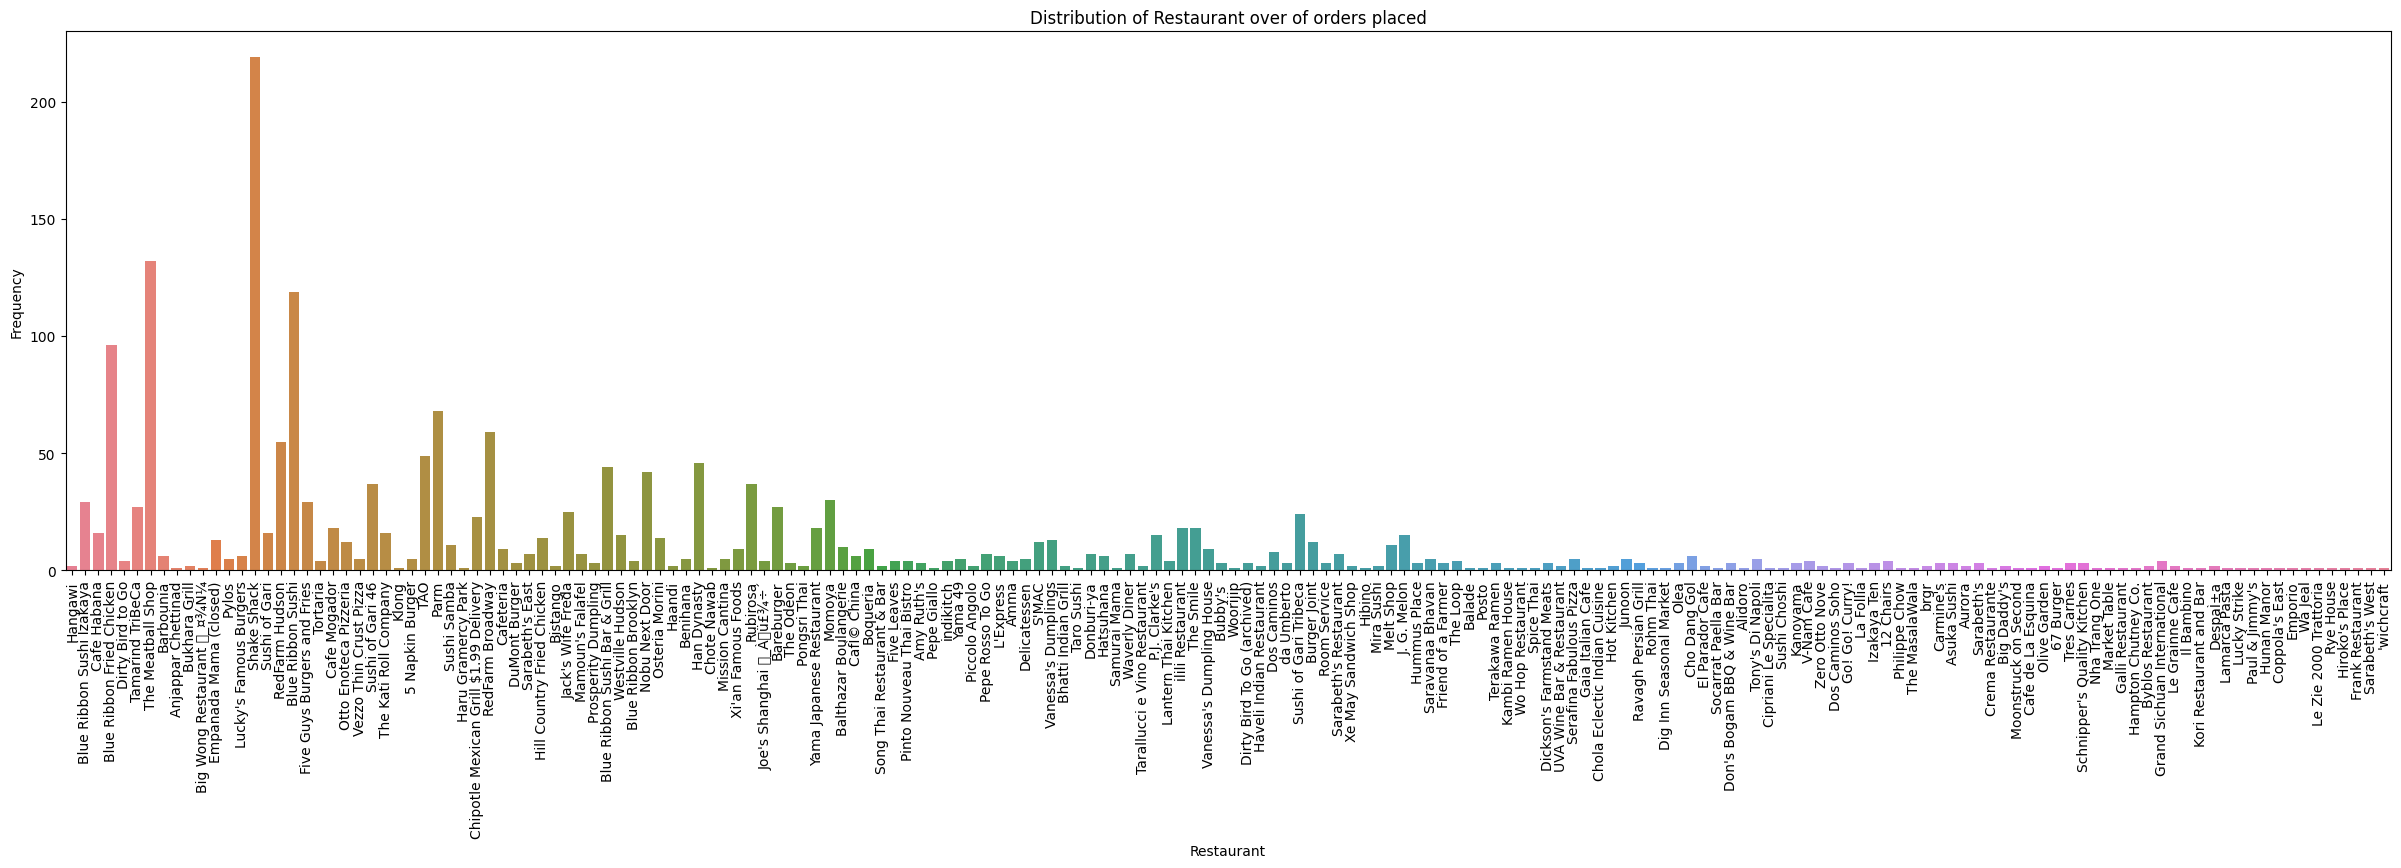

In [19]:
#Univariate:5
plt.figure(figsize=(30,7))
sns.countplot(data=df, x='restaurant_name', hue='restaurant_name');
plt.xticks(rotation=90);
plt.xlabel('Restaurant')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant over of orders placed')
plt.show()

####Observation
- Shake Shack has the highest number of orders received
- Next highest to Shake Shack is The Meatball Shop

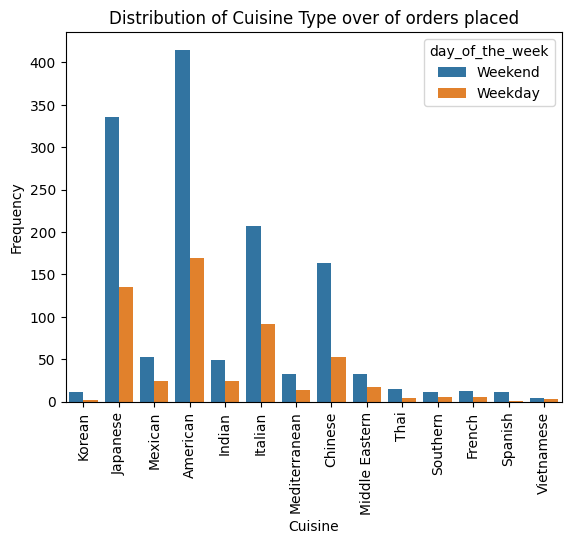

In [20]:
#Univariate:6
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week');
plt.xticks(rotation=90);
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.title('Distribution of Cuisine Type over of orders placed')
plt.show()

####Observation
- From the plot even on weekdays American cuisine type food is ordered the most
- The weekend orders were more than weekdays for any cuisine
- This proves people eat outside mostly during the weekends

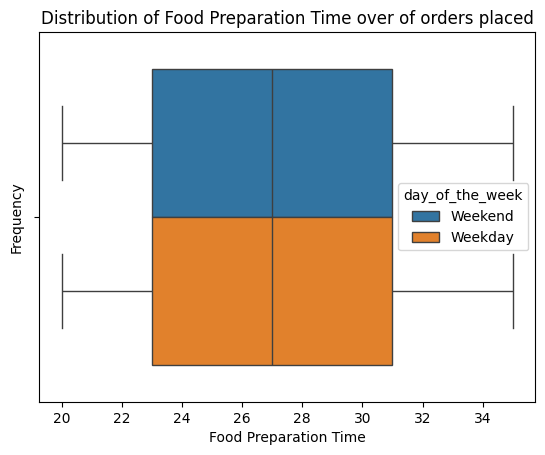

In [21]:
#Univariate:7
sns.boxplot(data=df, x='food_preparation_time', hue='day_of_the_week');
plt.xlabel('Food Preparation Time')
plt.ylabel('Frequency')
plt.title('Distribution of Food Preparation Time over of orders placed')
plt.show()

####Observation
- The average food preparation time for all cuisines are same for both weekend and weekday orders

**#### This covers the in-depth analysis on Univariate variables ####**


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(f'Top 5 Restaurants in terms of number of orders received is:')
top_5_restaurants


Top 5 Restaurants in terms of number of orders received is:


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
* Shake Shack received the most number of order

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [23]:
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().index[0]
print(f"The most popular cuisine on weekends is: {popular_cuisine_weekend}")


The most popular cuisine on weekends is: American


#### Observations:
- The most popular cuisine on weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:
perc_order_more_than_20 = df[df['cost_of_the_order'] > 20].shape[0]/df.shape[0]
print(f'The percentage of order cost more than $20 is : {perc_order_more_than_20}')

The percentage of order cost more than $20 is : 0.2924130663856691


#### Observations:
- Nearly 30% of the order where more than $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
mean_delivery_time  = df['delivery_time'].mean()
print(f'The mean order for delivery time is : {mean_delivery_time}' )

The mean order for delivery time is : 24.161749209694417


#### Observations:
- The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
- Above customer IDs will be getting 20% voucher discount

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


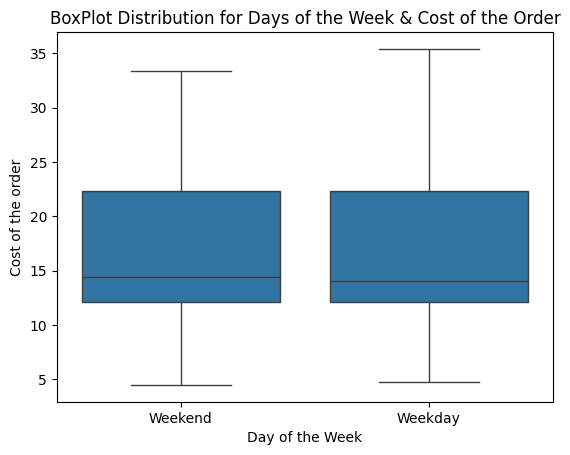

In [27]:
#Multivariage:1
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the order')
plt.title('BoxPlot Distribution for Days of the Week & Cost of the Order')
plt.show()

####Observation
- Weekend has slightly (a quater) mean price for the orders
- Weekdays has higher whiskers than the weekends

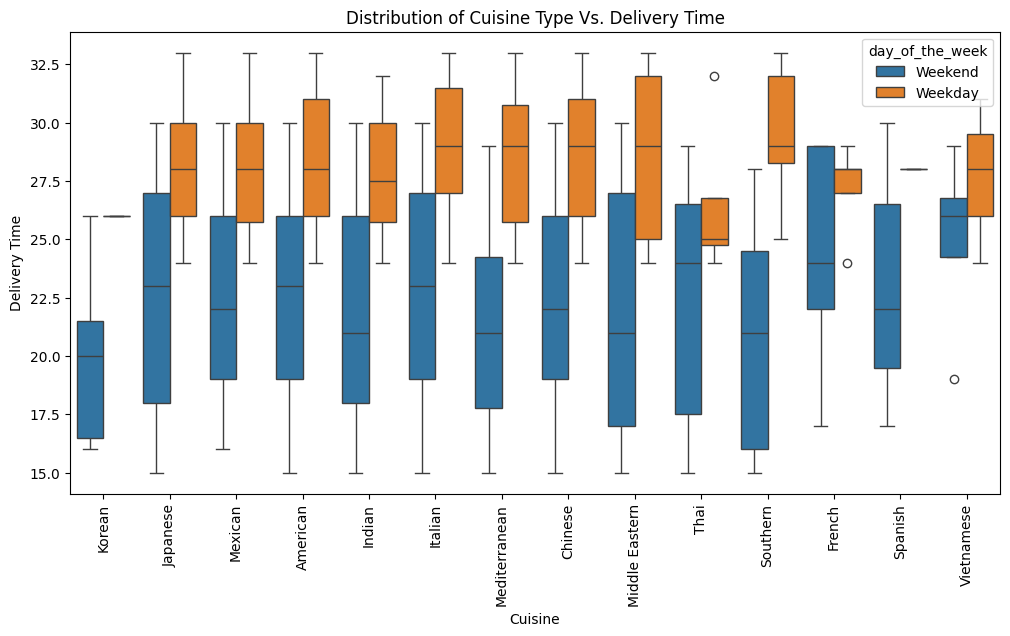

In [28]:
#Multivariate:2
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time', hue='day_of_the_week');
plt.xticks(rotation=90);
plt.xlabel('Cuisine')
plt.ylabel('Delivery Time')
plt.title('Distribution of Cuisine Type Vs. Delivery Time')
plt.show()

####Observation
- Lower whisker on weekends for Vietnamese is around 23.5 mins and there is one outlier for the cuisine
  - Vietnamese cuisine restaurant and app should improve on delivery time
- Korean cuisine has the best mean deliverytime of 20 mins on weekends
- Highest mean delivery time is for the French cuisine on weekends
- Average deliverytime for weekends is much less compared to weekdays for all the cuisine types

<ipython-input-29-e0bfd8fa3fa7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])


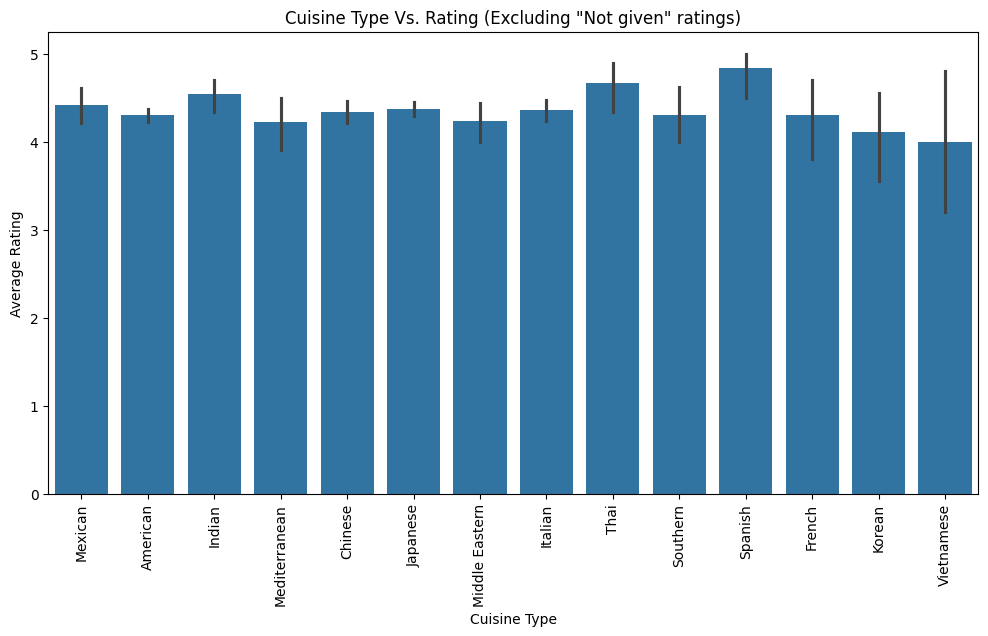

In [29]:
#Multivariate:3
# Filter out rows where the rating is 'Not given'
df_filtered = df[df['rating'] != 'Not given']

# Convert the 'rating' column to numeric for plotting
df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='cuisine_type', y='rating', data=df_filtered)
plt.xticks(rotation=90)
plt.title('Cuisine Type Vs. Rating (Excluding "Not given" ratings)')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.show()


####Observation
- Almost all Cuisine types have got good rating equal to or greater than 4.o
- Vietnamese also has good rating but the CI level is steep and it can fluctuate anytime
- 70% of the rating is disgarded as its **Not giver**
- This may be difficult the predict the actual rating

<ipython-input-30-2429e82e71aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])


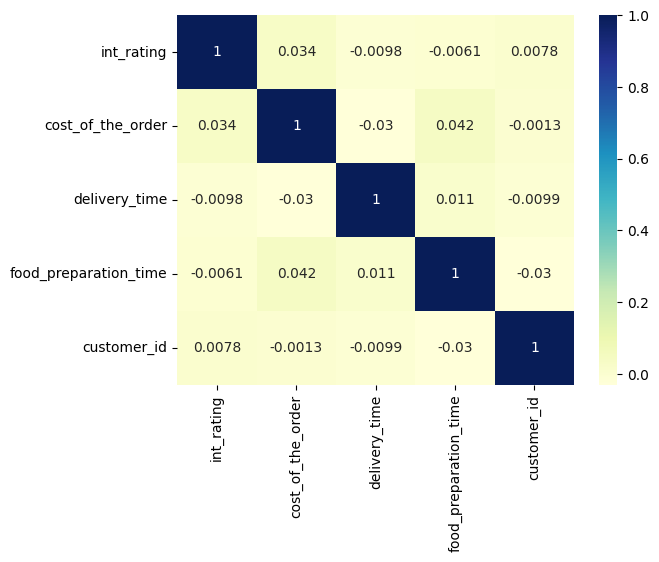

In [30]:
#Multivariate:4
df_filtered = df[df['rating'] != 'Not given']

# Convert the 'rating' column to numeric for plotting
df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])
df['int_rating'] = df_filtered['rating']
sns.heatmap(data=df[['int_rating','cost_of_the_order','delivery_time','food_preparation_time','customer_id']].corr(), annot=True, cmap='YlGnBu');


####Observation
- Most of the relation between the columns have a week correlation
- Food preparation time and cost of the order has the high correlation

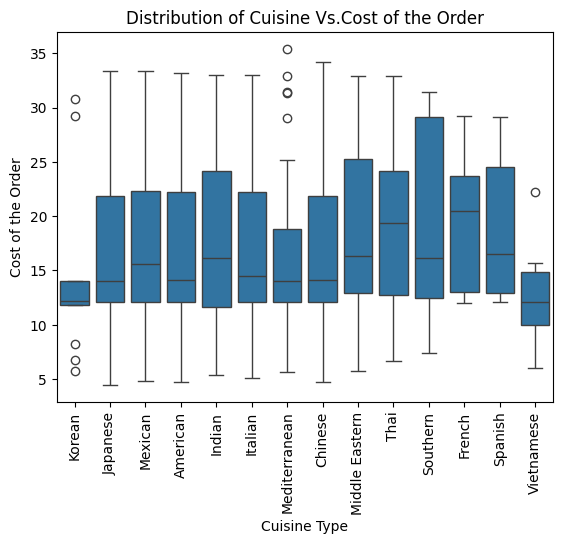

In [31]:
#Multivariate:5
sns.boxplot(data=df, y='cost_of_the_order', x='cuisine_type');
plt.xticks(rotation=90);
plt.ylabel('Cost of the Order')
plt.xlabel('Cuisine Type')
plt.title('Distribution of Cuisine Vs.Cost of the Order')
plt.show()

####Observation
* French cuisine has the highest median of cost of the order compared to other cuisine followed by thai
* Southern cuisine has a leap in the Q3 - the highest for the orders placed by the customers.
  - Explanation : The cost of the food ordered is more comparatively at the sourthern cuisine restaurants but their median price is as par with other cusines
- Vietnamese & Korean cuisine cost of order of food is lower compared all the other cuisine
  - There are few outlier (lower/upper) in Korean cuisine
- Mediterranean has more outliers and has the max of the cost of order of food

<ipython-input-32-9784e0cb5a5e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, y = 'cost_of_the_order' , x = 'food_preparation_time', ci = False ,hue='cuisine_type');


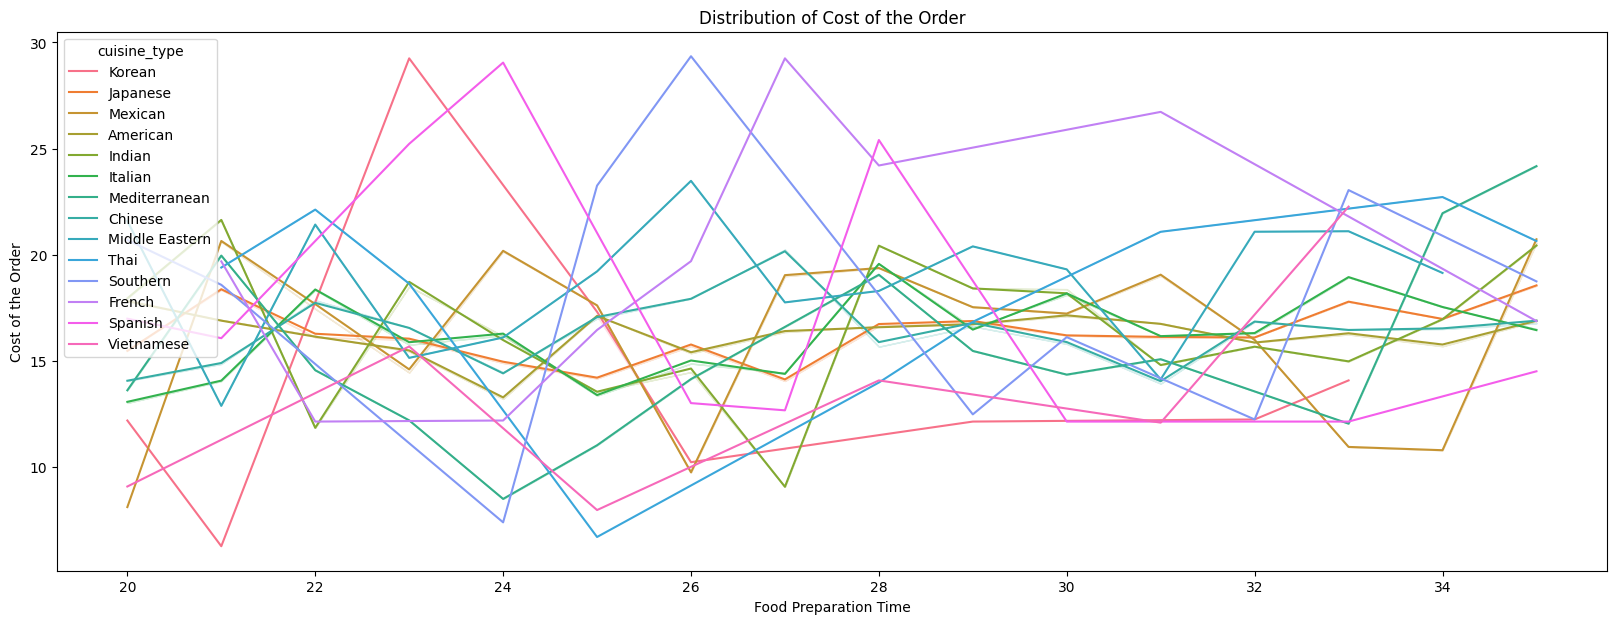

In [32]:
#Multivariate:6
plt.figure(figsize=(20,7))
sns.lineplot(data=df, y = 'cost_of_the_order' , x = 'food_preparation_time', ci = False ,hue='cuisine_type');
plt.ylabel('Cost of the Order')
plt.xlabel('Food Preparation Time')
plt.title('Distribution of Cost of the Order')
plt.show()

####Observation
- I wanted to plot this to understand if there is a correlation between Food Preparation Time Vs. Cost of the Order
  - But there is low correlation between the two variables
  - Check below and it is proved that low correlation

<ipython-input-33-34a63ef94837>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=korean_cuisine_df, y='cost_of_the_order', x='food_preparation_time', ci=False);


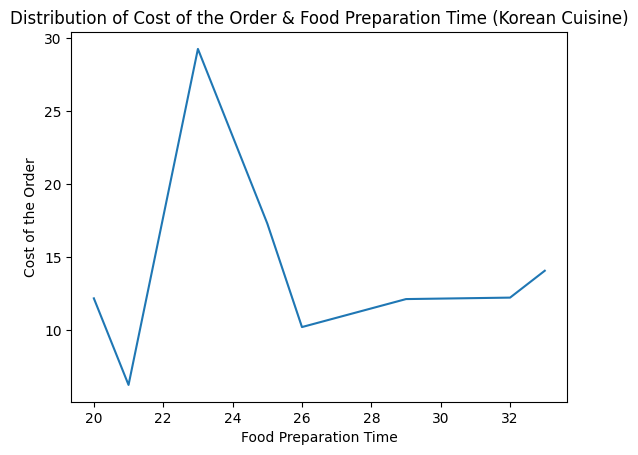

In [33]:
#Multivariate:7
korean_cuisine_df = df[df['cuisine_type'] == 'Korean']
sns.lineplot(data=korean_cuisine_df, y='cost_of_the_order', x='food_preparation_time', ci=False);
plt.ylabel('Cost of the Order')
plt.xlabel('Food Preparation Time')
plt.title('Distribution of Cost of the Order & Food Preparation Time (Korean Cuisine)')
plt.show()

####Obseravation
- This is in relation with the previous plot
- Wanted to check if the Food Preparation Time has correlation with cost of the order
  - Reason why this plot was chosen is that, in basic human assumption that if the cost of the food order is high should directly be proportional to Food Preparation Time (Direct Correlation) meaning that if the cost of order is high so should be the preparation time
  - But from the above plot its not correlated
- Example lets take Korean (second plot)
  - For order less than \$ 15 the plot shows that the preparation time can be more than 25 minutes
  - But for order greater than $15 the preparation time is 25 mins average
- Similar observaton in other cuisine as well
* Cost of the order does not matter with the food preparation time

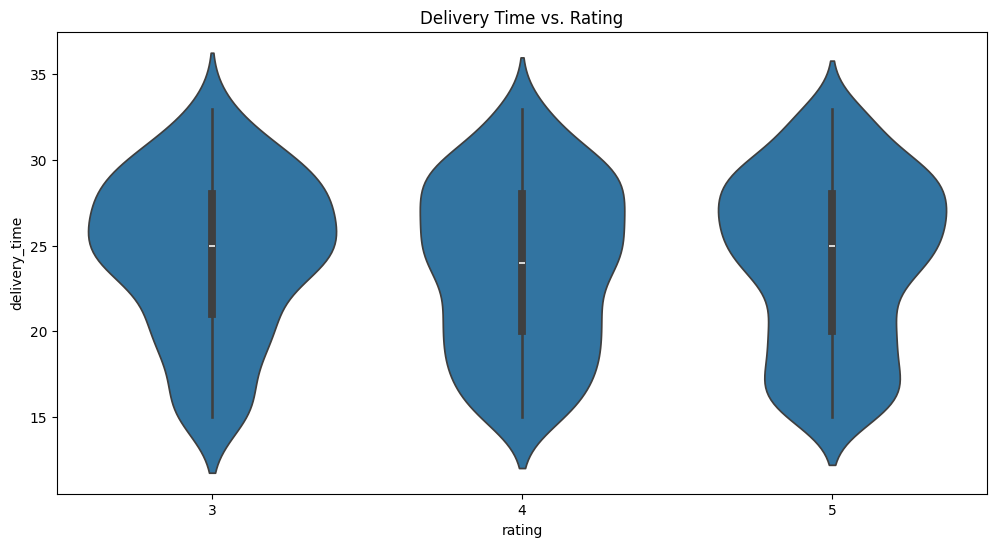

In [34]:
#Multivariate:8
plt.figure(figsize=(12, 6))
sns.violinplot(x='rating', y='delivery_time', data=df_filtered) # Use df_filtered for rating
plt.title('Delivery Time vs. Rating')
plt.show()

####Observation
- From the above plot will help to visualize if delivery times are different depending on the rating given by the customer
- The delivery time on an average is 25 for all ratings


**####End of Multivariate Analysis ####**


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [35]:
# Check for Not NaN values in the 'int_rating' column
notnan_int_rating = df[df['int_rating'].notna()]
restaurant_having_morethan_50_rating = notnan_int_rating.value_counts() > 50
#restaurant_having_morethan_50_rating.get(True, 0)

# Filter out rows where the rating is 'Not given'
df_filtered = df[df['rating'] != 'Not given']

# Convert the 'rating' column to numeric for plotting
df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])

# Group by restaurant name and calculate the count and mean of ratings
restaurant_ratings = df_filtered.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants with more than 50 rating counts and an average rating greater than 4
promotional_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
promotional_restaurants
# Print the names of restaurants fulfilling the criteria
#print(promotional_restaurants.index.tolist())



<ipython-input-35-242418a95761>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rating'] = pd.to_numeric(df_filtered['rating'])


,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
- For the given criteria only 4 restaurant fall into the brackets
- Shake Shack got most of the orders
- Blue Ribbon Fried Chicken got max mean ratings


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [42]:
food_cost_morethan_20 = ((df['cost_of_the_order'] > 20) *.25).sum()
print(f'Revenue generated on food cost more than $20 is ${food_cost_morethan_20}')
food_cost_morethan_5 = (((df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)) *.15).sum()
print(f'Revenue generated on food cost more than $05 and less than or equal $20 is ${food_cost_morethan_5}')
net_revenue = food_cost_morethan_20 + food_cost_morethan_5
print(f"Net revenue generated by the company: ${net_revenue}")

Revenue generated on food cost more than $20 is $138.75
Revenue generated on food cost more than $05 and less than or equal $20 is $200.09999999999997
Net revenue generated by the company: $338.84999999999997


#### Observations:
- More revenue is generated on food  orders greater than \$5 and less than or equal to $20


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [37]:
df['total_delivery_time'] = df['delivery_time'] + df['food_preparation_time']
total_delivery_time = df[df['total_delivery_time'] > 60]
total_delivery_time_percentage = (total_delivery_time.shape[0]/df.shape[0])*100
print(f'The percentage of orders that take more than 60 mins to get delivered from the time the order is placed is {total_delivery_time_percentage}')

The percentage of orders that take more than 60 mins to get delivered from the time the order is placed is 10.537407797681771


#### Observations:
- 10% of the order placed takes more than 60 mins
- Restaurants & App owner have to take caution in regards to the time taken to get the food delivered to the customer

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [38]:
mean_delivery = df.groupby('day_of_the_week')['delivery_time'].mean()
mean_delivery

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
- Weekend delivery of orders is quicker than the weekdays
  - App should have employed more people
  - Weekend orders are more than that of the weekday and there could have been multiple delivery by one agent for the delivery of food

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- Customer
  - Significant portion of the orders lack ratings
  - 10% of the orders exeed 60 mins
- Cuisine
  - American cusine is the most popular both overall and on weekends
  - Of all cusines Vietnamese cusine has more delivery time and slightly lower ratings
- Restaurant
  - American cuisine restaurants need to provided with promotional offers and also partner with restaurants to increase sales to meet demand on the cuisine
  - Cost of the food and food preparation time correlation does have seem to strong
- Revenue
  - Most of the revenue come from \$5 to $20 food order
  - Southern cuisine should have generated more revenue dispite of median cost of order

### Recommendations:
- Customer
  - 38.77% of the orders has not been rated and the FoodHub company has to encourage customers to rate the order and there by we can predict even more accurately on the ratings for the restaurants
    - Suggest more post-delivery prompts or email or phone communication should help customer rate
    - Incentivize for reviews
  - 10.5% of order took more than 60 mins for delivery and both the Restaurants and the FoodHub has to take measures to reduce the overall food preparation and delivery time
    - Improve kitchen efficiency
    - Expand delivery fleet
    - Route optimization (during peak time)
  - Target frequent customers with more offers
- Cuisine
  - American cuisines is the most popular and hence would recommend giving more discounts and offers to boot more sales
  - Vietnamese cuisines restaurants should be addressed for any bottlenecks or customer service issue
  - Consider explanding Korean and Mediterranean offerings as there are few outliers for both these cuisine and have potential value orders
- Restaurant
  - Provide support and incentives to top-performing restaurants (e.g., Shake Shack, Blue Ribbon Fried Chicken) to maintain their high quality and attract more customers.
  - Offer promotional incentives to restaurants with over 50 ratings and averages above 4, boosting visibility and encouraging more orders.
  - Restaurants should ensure efficiency in food preparation time irrespective of cost of the food
-Revenue
  - Consider strategy for increasing order cost by promting combo deals
  - Fine tune commission structure
    - Cost of order from \$5 to $10 will commission 12%
    - Cost of order from \$11 to $20 will commission to 18%
    - Cost of order above \$20 will commission 22%
    - Above fine tunning might be a good strategy for both restaurants and FoodHub for more revenue generation. As 25% tarrif on food order greater than \$20 might could deter customer spending
    - Win Win situation
- Final
  - Get Ratings more aggressively and provide discounts to both Customers and Restaurants
  - Promote higer value orders to generate more revenue for both Restaurants and FoodHub

---